<a href="https://colab.research.google.com/github/SaulVid/mat421sv/blob/main/interpolation2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lagrange polynomial interpolation is technique used to find a polynomial that passes through all given data points.

enter x value 0-100:1
1
27.168004999999997


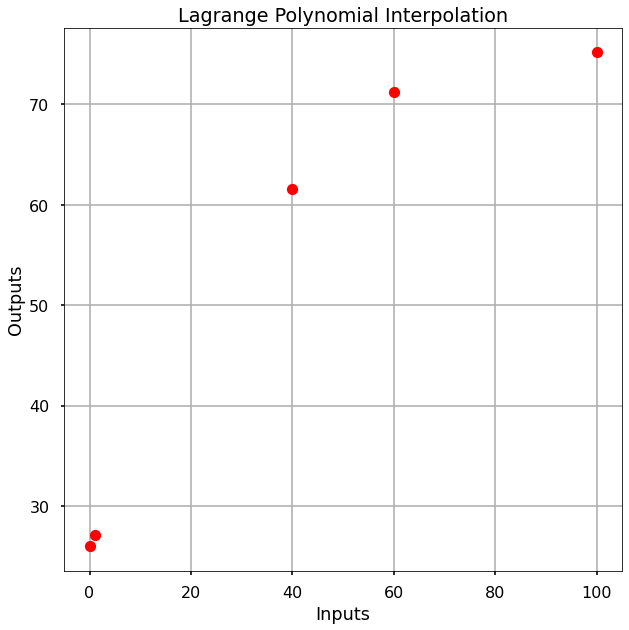

In [ ]:
#for the given the data set, the Lagrange polynomial calculator can give the value of any given x

x = [0,40,60,100]
y = [26.0, 61.6, 71.2, 75.2]
m = len(x)
n = m-1
xf = int(input("enter x value 0-100:"))
yf = 0
for i in range(n+1):
  f = 1
  for j in range (n+1):
    if j != i:
      f*=(xf - x[j])/(x[i]-x[j])
  yf += y[i]*f

print(xf) #input
print(yf) #output

#graphing given data points along with the user input for x along the polynomial
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

x = [0,40,60,100,xf]
y = [26.0, 61.6, 71.2, 75.2,yf]
x_new = np.arange(0, 60, 100)

f = lagrange(x, y)

fig = plt.figure(figsize = (10,10))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial Interpolation')
plt.grid()
plt.xlabel('Inputs')
plt.ylabel('Outputs')
plt.show()

     

Similarly to Lagrange,  Newton’s Polynomial Interpolation is also used to find equation given a set of data points

Enter x between -6 and 20
Enter y20


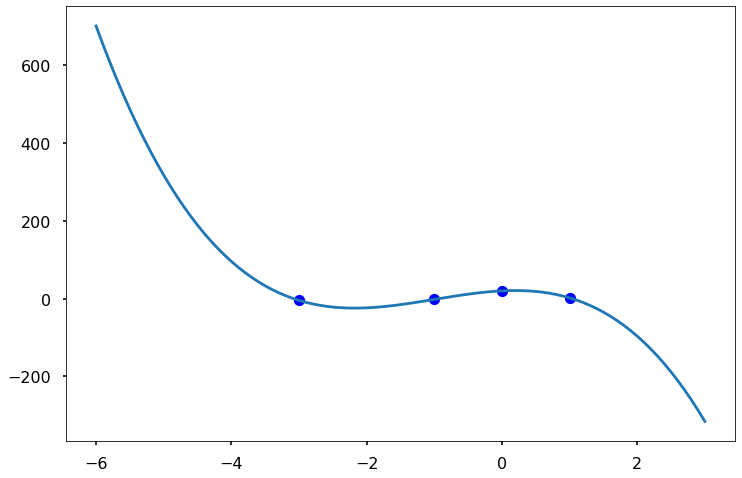

In [ ]:
#graphs line for given data points, and any point desired by user within boundry restrictions.
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline

def divided_diff(x, y):
  n = len(y)
  coef = np.zeros([n, n])
  coef[:,0] = y

  for j in range (1,n):
    for i in range(n-j):
      coef[i][j] = \
      (coef [i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

  return coef

def newton_poly(coef, x_data, x):

  n = len(x_data) - 1
  p = coef[n]
  for k in range (1, n+1):
    p = coef[n-k] + (x - x_data[n-k]) * p
  return p

xi = float(input("Enter x between -6 and 2")) #entering values outside [-6,2] is still in domain of polynomial but will distort graph
yi = float(input("Enter y"))

xthree = np.array([xi, -3, 1, -1])
ythree = np.array([yi, -4.5, 2,-2])

a_s = divided_diff(xthree, ythree) [0, :]

x_neww = np.arange(-6, 3.1, .1)
y_neww = newton_poly(a_s, xthree, x_neww)

plt.figure(figsize = (12,8))
plt.plot(xthree, ythree, 'bo')
plt.plot(x_neww, y_neww)
     